PDF Text Summarization and Similarity Search
Overview


This project provides a complete solution for extracting text from PDF documents, generating embeddings, finding similar documents based on cosine similarity, and summarizing the most relevant text using deep learning models. The code is designed to run in Google Colab, leveraging GPU capabilities for faster processing.

### Framework

Libraries Used

1. Transformers: A library by Hugging Face that provides pre-trained models for natural language processing (NLP) tasks such as summarization and text embedding.
2. PDFPlumber: A Python library for extracting text and metadata from PDF files.
3. Sentence Transformers: A library for generating sentence and text embeddings efficiently, based on transformer models.
4. Scikit-learn: A machine learning library that provides tools for calculating cosine similarity between vectors.



In [42]:
!pip install graphviz


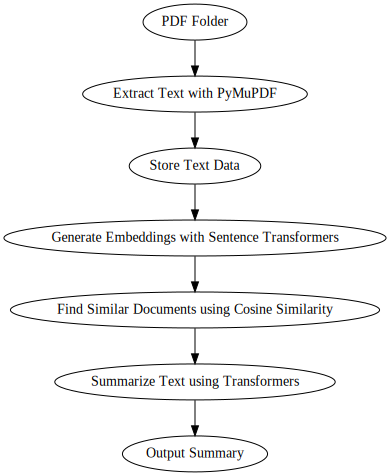

In [44]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes with labels
dot.node('A', 'PDF Folder')
dot.node('B', 'Extract Text with PyMuPDF')
dot.node('C', 'Store Text Data')
dot.node('D', 'Generate Embeddings with Sentence Transformers')
dot.node('E', 'Find Similar Documents using Cosine Similarity')
dot.node('F', 'Summarize Text using Transformers')
dot.node('G', 'Output Summary')

# Add edges to define the flow
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])

# Render the graph
dot.render('flowchart', format='png', cleanup=True)

# Display the graph in the notebook
dot


In [28]:
from google.colab import files
uploaded = files.upload()  # This will open an upload dialogue

Saving data.zip to data.zip


In [29]:
import zipfile
import os

# Unzip the uploaded zip file
zip_file = "data.zip"  # Name of the uploaded zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/pdfs")  # Extract to the /content/pdfs directory

# Verify the directory contents
os.listdir("/content/pdfs")

['data']

In [30]:
# Step 1: Install Required Libraries
!pip install PyMuPDF transformers sentence-transformers

In [31]:
import os
import fitz  # PyMuPDF
import pickle
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
# Step 2: Extract Text from PDFs
def extract_text_from_pdfs(pdf_folder):
    text_data = {}
    for pdf_file in os.listdir(pdf_folder):
        if pdf_file.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder, pdf_file)
            doc = fitz.open(pdf_path)
            text = ""
            for page in doc:
                text += page.get_text()
            text_data[pdf_file] = text
            doc.close()
    return text_data


In [33]:
# Step 3: Save Extracted Text as Pickle
def save_text_data(text_data, output_file):
    with open(output_file, 'wb') as f:
        pickle.dump(text_data, f)


In [34]:
# Step 4: Load Text Data from Pickle
def load_text_data(input_file):
    with open(input_file, 'rb') as f:
        return pickle.load(f)

In [35]:
# Step 5: Generate Embeddings
def generate_embeddings(text_data):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = {doc: model.encode(text) for doc, text in text_data.items()}
    return embeddings

In [36]:
# Step 6: Find Most Similar Document
def find_most_similar(query, embeddings, model):
    query_embedding = model.encode(query)
    similarities = {}

    for doc, embedding in embeddings.items():
        sim = cosine_similarity([query_embedding], [embedding])[0][0]
        similarities[doc] = sim

    sorted_docs = sorted(similarities.items(), key=lambda item: item[1], reverse=True)

    if len(sorted_docs) == 0:
        raise ValueError("No documents found with valid similarity scores.")

    return sorted_docs[0]  # Return the most similar document


In [37]:
# Step 7: Summarize Text
def summarize_text(text):
    summarizer = pipeline("summarization", model="t5-small")
    summary = summarizer(text, max_length=150, min_length=30, do_sample=False)
    return summary[0]['summary_text']


In [38]:
# Step 8: Run the Complete Workflow
# Specify the folder containing your PDF files
pdf_folder = "/content/pdfs/data"  # Update this path to your PDF folder
pickle_file = "text_data.pkl"

# Extract text from PDFs
text_data = extract_text_from_pdfs(pdf_folder)

# Check if text_data is empty and print a message if it is
if not text_data:
    print("No text data found in the specified folder.")

# Save the extracted text as a pickle file
save_text_data(text_data, pickle_file)

# ... rest of your code ...

In [39]:
# Extract text from PDFs
text_data = extract_text_from_pdfs(pdf_folder)

# Save the extracted text as a pickle file
save_text_data(text_data, pickle_file)

# Load text data from the pickle file
text_data = load_text_data(pickle_file)

# Generate embeddings for the extracted text
embeddings = generate_embeddings(text_data)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [41]:
# Example query
query = "what is Multi-Head Attention?"
'

# Find the most similar document
most_similar_doc = find_most_similar(query, embeddings, SentenceTransformer('all-MiniLM-L6-v2'))
print(f"Most similar document: {most_similar_doc[0]} with similarity score: {most_similar_doc[1]:.4f}")

# Summarize the most similar document
relevant_text = text_data[most_similar_doc[0]]
summary = summarize_text(relevant_text)
print("Summary:", summary)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Most similar document: NIPS-2017-attention-is-all-you-need-Paper.pdf with similarity score: 0.3023


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Token indices sequence length is longer than the specified maximum sequence length for this model (8537 > 512). Running this sequence through the model will result in indexing errors


Summary: a recurrent neural network consists of two sub-layers, a stack of N = 6 identical layers . a single attention layer is based on a multi-head attention function . we use the decoder to compute a representation of a sequence of symbols .


In [27]:
# from google.colab import drive
# drive.mount('/content/drive')